# Solution — PCA on `day5_example.csv`

Steps:
1. Load the data and separate `group` and numeric variables.
2. Standardize features and fit PCA.
3. Scree plot (+ cumulative) and simple rule to pick components.
4. Individual map (PC1–PC2) with points colored by `group`.
5. Correlation circle (loadings) for `Gene1`–`Gene3`.
6. Short conclusion template.


In [14]:
# 1. Load the dataset
import pandas as pd

df = pd.read_csv("../data/day5_example.csv")
y = df['group']
X = df[['Gene1', 'Gene2', 'Gene3']]
df.head()

,group,Gene1,Gene2,Gene3
0,A,0.524097,-0.047710,-0.545653
1,A,-2.260768,-1.519615,-0.398969
2,A,-0.019680,0.794936,0.585381
3,A,0.183140,-0.144233,0.163862
4,A,-0.361351,-0.706498,0.141025


In [15]:
# 2. Standardized PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
Xz = scaler.fit_transform(X)

pca = PCA(n_components=3, random_state=0)

X_pca = pca.fit_transform(Xz)
expl_var = pca.explained_variance_ratio_
expl_var.sum()

np.float64(1.0)

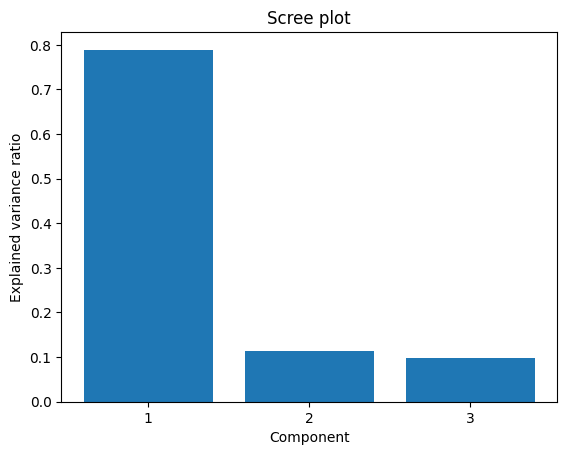

In [16]:
# 3. Scree plot (+ cumulative) and simple selection rules
import matplotlib.pyplot as plt
import numpy as np

evr = pca.explained_variance_ratio_
plt.figure()
plt.bar(range(1, len(evr)+1), height=evr)
plt.title('Scree plot')
plt.xlabel('Component')
plt.ylabel('Explained variance ratio')
plt.xticks([1,2,3])
plt.show()

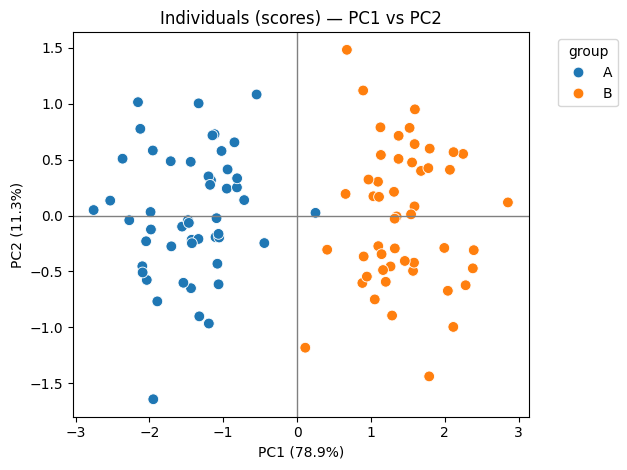

In [17]:
# 4. Individual map (PC1 vs PC2), color by group
import seaborn as sns
import matplotlib.pyplot as plt

pc1, pc2 = X_pca[:, 0], X_pca[:, 1]
plt.figure()
sns.scatterplot(x=pc1, y=pc2, hue=y, s=60)
plt.axhline(0, linewidth=1, color='grey')
plt.axvline(0, linewidth=1, color='grey')
var1 = pca.explained_variance_ratio_[0]*100
var2 = pca.explained_variance_ratio_[1]*100
plt.xlabel(f'PC1 ({var1:.1f}%)')
plt.ylabel(f'PC2 ({var2:.1f}%)')
plt.title('Individuals (scores) — PC1 vs PC2')
plt.legend(title='group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

array([[136.49417457, 135.47546784, 137.9755692 ],
       [-20.58159296,  26.30368908,  -5.46645356],
       [-16.07558245,  -7.70191865,  23.46534542]])

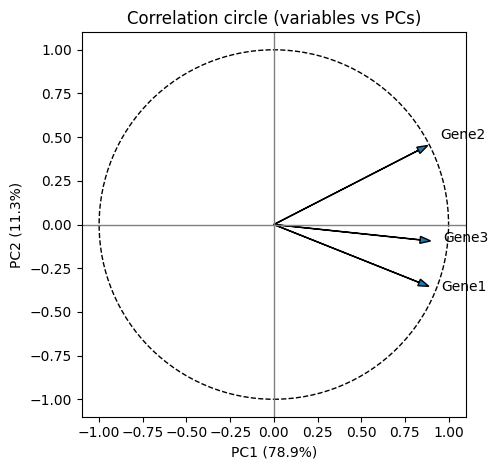

In [26]:
# 5. Correlation circle 

import numpy as np
import matplotlib.pyplot as plt

features = X.columns.tolist()

# Compute correlation between input variables and
# components
C = np.corrcoef(np.hstack([Xz, X_pca]), rowvar=False)
p = X.shape[1]
corr_vars_pc = C[:p, p:]   # shape: (p, n_components)

# Get dimensions 1 and 2 for the correlation circle
xs, ys = corr_vars_pc[:, 0], corr_vars_pc[:, 1]

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
circle = plt.Circle((0,0), 1, fill=False, linestyle='--')
ax.add_artist(circle)
ax.axhline(0, color='grey', linewidth=1)
ax.axvline(0, color='grey', linewidth=1)

for i, f in enumerate(features):
    ax.arrow(0, 0, xs[i], ys[i], head_width=0.04, length_includes_head=True)
    ax.text(xs[i]*1.08, ys[i]*1.08, f)

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
var1 = pca.explained_variance_ratio_[0]*100
var2 = pca.explained_variance_ratio_[1]*100
ax.set_xlabel(f'PC1 ({var1:.1f}%)')
ax.set_ylabel(f'PC2 ({var2:.1f}%)')
ax.set_title('Correlation circle (variables vs PCs)')
plt.tight_layout()
plt.show()


## 6) Conclusion

